In [1]:
#决策树例子

from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv

In [2]:
#读入数据
Dtree = open(r'AllElectronics.csv','r')
reader = csv.reader(Dtree)#文件很多是字符，全是数字用numpy genfromtxt

headers = reader.__next__()
print(headers)

['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']


In [3]:
featureList = []
labelList = []

for row in reader:
    #lable是标签列
    labelList.append(row[-1])

    rowDict = {}
    for i in range(1, len(row)-1):
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)
    
#     print(row[-1])
print(featureList)
    

[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'medium', 'student': 'no', 'credit_rating': 'excellent'}, {'ag

In [4]:
#把数据转化成01表示
vec  = DictVectorizer()

x_data = vec.fit_transform(featureList).toarray()

print("x_data:" + str(x_data))

#打印属性名称

print(vec.get_feature_names())#注意vec是可以得到的

#打印标签
print('labelList:' + str(labelList))

#把标签转化为01表示

lb  = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
print('y_data:' +str(y_data))

x_data:[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]
['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
labelList:['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
y_data:[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [5]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_data,y_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
#测试
x_test = x_data[0]
print('x_test:' + str(x_test))
print(x_test.reshape(1,-1))#转化为二维
predict = model.predict(x_test.reshape(1,-1))
print('predict:' + str(predict))

x_test:[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]]
predict:[0]


In [18]:
#导出决策树

import graphviz

dot_data = tree.export_graphviz(model,
                                            out_file= None,
                                            feature_names = vec.get_feature_names(),
                                            class_names = lb.classes_,
                                            filled = True,
                                            rounded = True,
                                            special_characters =True)

graph = graphviz.Source(dot_data)
graph.render('computer')
# print(1b.classes_)

'computer.pdf'

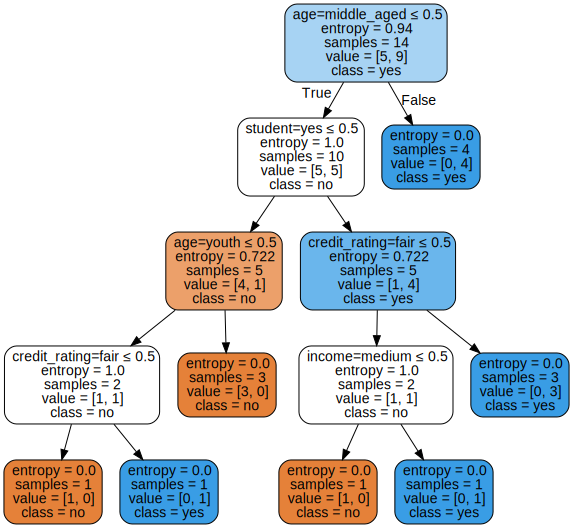

In [19]:
graph